In [1]:
import sys
sys.path.append('../../src')
from LogisticRegression import LogisticRegression as mylg
from metrics import accuracy_score, confusion_matrix, recall, precision
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
from numpy.random import normal
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as skcm
from sklearn.metrics import accuracy_score as skas
from sklearn.metrics import recall_score as skrc

# Binary Classification Examples

## Using make_blob from sklearn library

## Generating data

In [6]:
X, y = make_blobs(n_samples= 400, cluster_std=[2.0,1.0], centers=[(0,7),(3,3)], random_state=42)

Text(0, 0.5, 'Feature2')

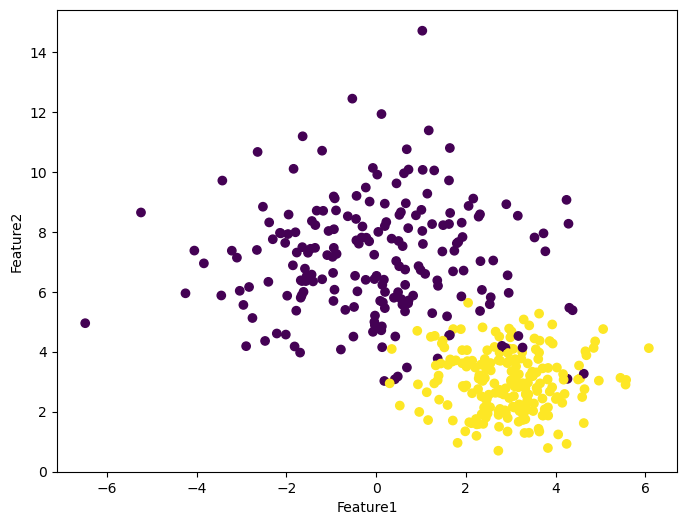

In [8]:
# Data Visualization
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature1')
plt.ylabel('Feature2')

### Spliting data into train and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## Applying Logistic Regression

We test the package with both 'gradient_descent' and 'newton' solvers. We finally compare the results with Scikit-learn

#### Gradient Descent Solver

In [16]:
logreg = mylg(solver='gradient_descent', max_iter=4000, learning_rate=0.001)

In [18]:
logreg.fit(X_train, y_train)

Maximum number of iteration reached


In [20]:
logreg.coeffs

array([ 1.00548232, -1.74619862,  6.32384716])

In [22]:
y_pred = logreg.predict(X_test)

In [24]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9375

array([[35,  4],
       [ 1, 40]])

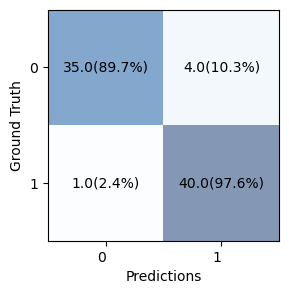

In [26]:
confusion_matrix(y_test, y_pred, visualize=True)

In [28]:
recall(y_test, y_pred)

0.975609756097561

In [30]:
precision(y_test, y_pred)

0.9090909090909091

#### Newton solver

In [27]:
newreg = mylg(solver='newton')

In [29]:
newreg.fit(X_train, y_train)

Newton method converged


In [31]:
logreg.coeffs

array([ 1.00548232, -1.74619862,  6.32384716])

In [33]:
y_pred = logreg.predict(X_test)

In [35]:
# Accuracy score
np.sum(y_pred==y_test)/len(y_test)

0.9375

#### sklearn Results

In [32]:
sklog = LogisticRegression()

In [34]:
sklog.fit(X_train, y_train)

LogisticRegression()

In [36]:
sklog.intercept_

array([6.22806267])

In [38]:
y_pred = logreg.predict(X_test)

In [40]:
# Accuracy score
skas(y_test, y_pred)

0.9375

In [42]:
skcm(y_test, y_pred)

array([[35,  4],
       [ 1, 40]], dtype=int64)

In [44]:
skrc(y_test, y_pred)

0.975609756097561

**All the results obtained from Scikit-learn match the results from the current package!**

## Using breast_cancer dataset from sklearn

In [49]:
from sklearn.datasets import load_breast_cancer

In [51]:
bcancer = load_breast_cancer()

In [53]:
X = bcancer.data
y = bcancer.target

I skip the data visualization and exploration assuming this dataset has been cleaned and prepared as a toy dataset. Feel free to load it to `pandas` and use `seaborn` to explore the data and understand it better.

### Spliting data into train and test sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## Applying Logistic Regression

We test the package with both 'gradient_descent' and 'newton' solvers. We finally compare the results with Scikit-learn

#### Gradient Descent Solver

In [57]:
logreg = mylg(solver='gradient_descent', max_iter=4000, learning_rate=0.001)

In [59]:
logreg.fit(X_train, y_train)

C:\Users\navid\Documents\projects\GitHub\ML_from_scratch\examples\Logistic_Regression\../../src\utility.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Maximum number of iteration reached


In [63]:
y_pred = logreg.predict(X_test)

In [65]:
# Accuracy score
np.sum(y_pred==y_test)/len(y_test)

0.956140350877193

#### Newton solver

In [67]:
newreg = mylg(solver='newton')

In [69]:
newreg.fit(X_train, y_train)

Newton method converged


In [73]:
y_pred = logreg.predict(X_test)

In [75]:
# Accuracy score
np.sum(y_pred==y_test)/len(y_test)

0.956140350877193

#### sklearn Results

In [77]:
sklog = LogisticRegression()

In [79]:
sklog.fit(X_train, y_train)

C:\Users\navid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred = logreg.predict(X_test)

C:\Users\navid\Documents\projects\GitHub\ML_from_scratch\examples\Logistic_Regression\../../src\utility.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [83]:
# Accuracy score
np.sum(y_pred==y_test)/len(y_test)

0.956140350877193